In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy.linalg as la

from sklearn.decomposition import PCA
from pca import pca
from factor_analyzer import FactorAnalyzer

from sklearn.cluster import KMeans

from statsmodels.multivariate.manova import MANOVA

# Carga de datos

In [14]:
data=pd.read_csv("../data/ms_authors.csv",dtype={"age":int,"time":int})
data["citationsProducts"]=data["citations"]/data["products"]
data["pressProducts"]=data["press"]/data["products"]
data["ageProducts"]=data["age"]/data["products"]
data["timeProducts"]=data["time"]/data["products"]
data["productsAge"]=data["products"]/data["age"]
data["productsTime"]=data["products"]/data["time"]
data["std_products"]=(data["products"]-np.mean(data["products"]))/np.std(data["products"])
data["std_citations"]=(data["citations"]-np.mean(data["citations"]))/np.std(data["citations"])
data["std_press"]=(data["press"]-np.mean(data["press"]))/np.std(data["press"])
data["std_citationsProducts"]=(data["citationsProducts"]-np.mean(data["citationsProducts"]))/np.std(data["citationsProducts"])
data["std_pressProducts"]=(data["pressProducts"]-np.mean(data["pressProducts"]))/np.std(data["pressProducts"])
data["std_productsAge"]=(data["productsAge"]-np.mean(data["productsAge"]))/np.std(data["productsAge"])
data["std_productsTime"]=(data["productsTime"]-np.mean(data["productsTime"]))/np.std(data["productsTime"])
data["std_oslevel"]=(data["oslevel"]-np.mean(data["oslevel"]))/np.std(data["oslevel"])
data["std_oscategory"]=(data["oscategory"]-np.mean(data["oscategory"]))/np.std(data["oscategory"])
data

,products,citations,press,age,sex,time,level,category,nlevel,ncategory,...,productsTime,std_products,std_citations,std_press,std_citationsProducts,std_pressProducts,std_productsAge,std_productsTime,std_oslevel,std_oscategory
0,101,94,8,59,M,31,DOCTORADO,TITULAR,3,4,...,3.258065,0.963523,0.713775,0.118732,0.199356,-0.220456,0.767876,0.048045,1.125877,1.278961
1,23,6,2,74,M,49,DOCTORADO,TITULAR,3,4,...,0.469388,-0.291436,-0.450852,-0.238866,-0.596456,-0.216539,-0.394190,-0.471513,-0.313880,-0.156917
2,35,32,2,49,M,12,DOCTORADO,ASOCIADO,3,3,...,2.916667,-0.098365,-0.106758,-0.238866,0.179863,-0.231609,-0.059539,-0.015561,-0.114940,-0.156917
3,5,1,9,55,F,26,DOCTORADO,ASOCIADO,3,3,...,0.192308,-0.581041,-0.517024,0.178332,-0.668774,0.649351,-0.576582,-0.523136,-0.313880,-0.324071
4,120,149,2,68,M,26,DOCTORADO,TITULAR,3,4,...,4.615385,1.269218,1.441668,-0.238866,0.568821,-0.252068,0.811704,0.300927,1.483082,1.684734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,10,4,5,55,M,17,MAESTRIA,ASISTENTE,2,1,...,0.588235,-0.500595,-0.477321,-0.060067,-0.431156,-0.007758,-0.501180,-0.449370,-0.584946,-0.664480
251,49,34,4,62,F,34,MAESTRIA,TITULAR,2,4,...,1.441176,0.126884,-0.080289,-0.119667,-0.082002,-0.219230,0.003528,-0.290459,-0.313880,0.168423
252,3,0,1,46,M,19,DOCTORADO,ASOCIADO,3,3,...,0.157895,-0.613220,-0.530258,-0.298466,-0.906393,-0.092003,-0.597891,-0.529547,-0.313880,-0.324071
253,17,9,1,52,F,13,DOCTORADO,ASOCIADO,3,3,...,1.307692,-0.387971,-0.411149,-0.298466,-0.277403,-0.230759,-0.380826,-0.315328,-0.313880,-0.324071


In [11]:
data.to_excel("investigadores_prensa_udea.xlsx")

### Descripción de los datos
Los datos provienen de las dependencias puntaje y recurso humano de la universidad de antioquia. Con ellos realizamos un proceso de búsqueda de la aparición del investigador en medios de comunicación (prensa).
Ignoramos los docentes que no tienen producción científica.

Las variables se describen a continuación:
* products (int): Cantidad de publicaciones
* citations (int): Cantidad de veces que han sido citados todos los productos
* citations/products (float): Cantidad de citas dividido la cantidad de productos
* press (int): cantidad de artículos de prensa en los que ha aparecido el investigador
* age (int): Edad del investigador
* time (int): Años que el investigador ha estado en la universidad
* sex (str): Sexo del investigador
* level (str): Nivel académico
* category (str): Categoría

In [12]:
data.describe()

,products,citations,press,age,time,nlevel,ncategory,oscategory,oslevel,citationsProducts,pressProducts,ageProducts,timeProducts,productsAge,productsTime,std_products,std_citations,std_press,std_oslevel,std_oscategory
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02
mean,41.113725,40.066667,6.007843,51.470588,16.376471,2.725490,2.937255,2.937255,1.725490,0.762898,0.515349,6.147984,1.744017,0.786069,3.000187,-6.269495e-17,-2.176908e-17,1.393221e-17,-1.671865e-16,2.507798e-16
std,62.275667,75.709241,16.811599,8.810232,8.909841,0.447145,1.185536,1.185536,0.447145,0.843341,1.982252,10.618531,3.990455,1.208029,5.377959,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00
min,1.000000,0.000000,1.000000,32.000000,2.000000,2.000000,1.000000,1.923613,1.388939,0.000000,0.002079,0.082789,0.017429,0.013699,0.022727,-6.453983e-01,-5.302584e-01,-2.984660e-01,-7.541482e-01,-8.566885e-01
25%,8.000000,2.000000,1.000000,45.000000,10.000000,2.000000,2.000000,2.553812,1.585416,0.213810,0.046537,1.065088,0.306931,0.162714,0.673333,-5.327738e-01,-5.037896e-01,-2.984660e-01,-3.138804e-01,-3.240705e-01
50%,22.000000,11.000000,2.000000,50.000000,16.000000,3.000000,3.000000,2.751590,1.585416,0.500000,0.111111,2.480000,0.677419,0.403226,1.476190,-3.075248e-01,-3.846800e-01,-2.388663e-01,-3.138804e-01,-1.569167e-01
75%,50.000000,46.500000,4.000000,59.000000,21.000000,3.000000,4.000000,2.751590,1.720341,1.000000,0.333333,6.145833,1.485294,0.938911,3.258065,1.429732e-01,8.514132e-02,-1.196669e-01,-1.153819e-02,-1.569167e-01
max,481.000000,675.000000,199.000000,79.000000,50.000000,3.000000,4.000000,14.052831,5.416106,5.843750,28.428571,73.000000,44.000000,12.078947,57.375000,7.077425e+00,8.402963e+00,1.150228e+01,8.269973e+00,9.394428e+00


# PCA

### Los datos sin modificar

In [82]:
pca_data=data[["products","citations","press","age","time","oslevel","oscategory"]]

In [84]:
np.mean(pca_data)

products      41.113725
citations     40.066667
press          6.007843
age           51.470588
time          16.376471
oslevel        1.725490
oscategory     2.937255
dtype: float64

In [85]:
np.std(pca_data)

products      62.153438
citations     75.560646
press         16.778603
age            8.792940
time           8.892354
oslevel        0.446267
oscategory     1.183209
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


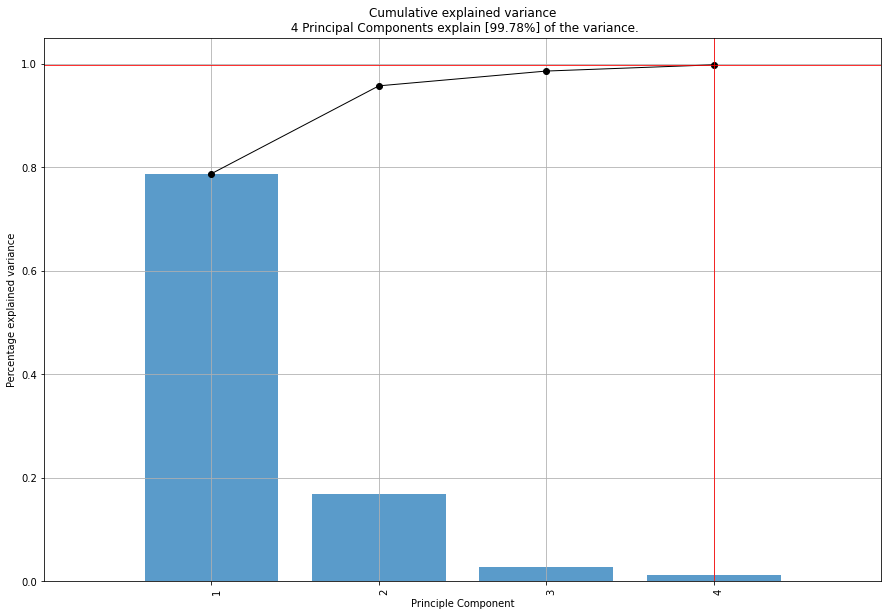

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

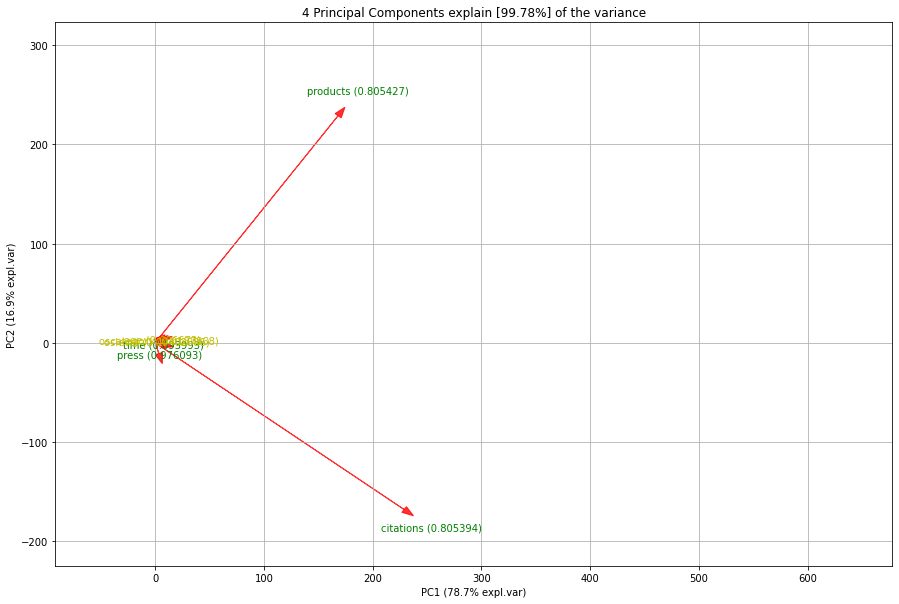

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


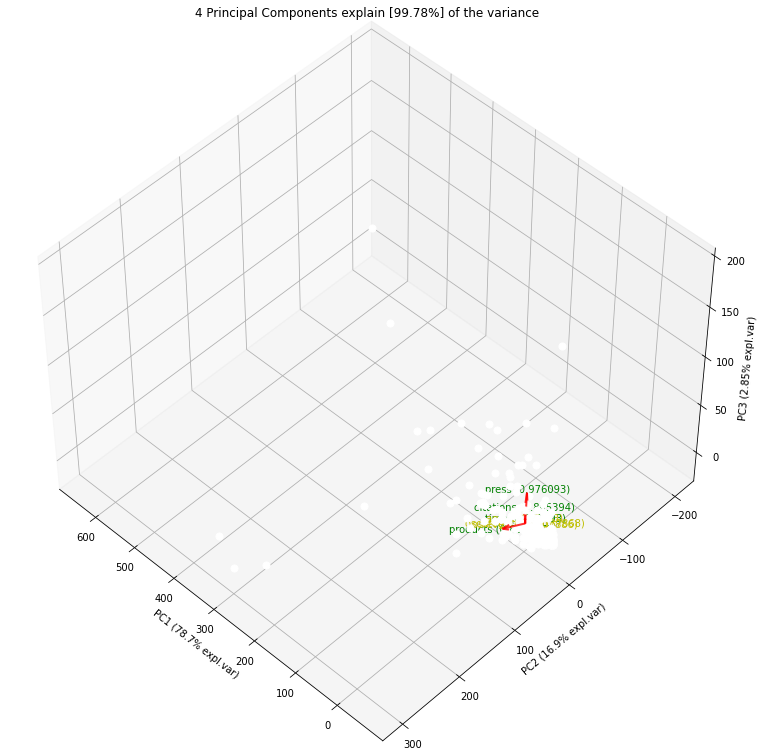

In [86]:
model=pca(n_components=4)
results=model.fit_transform(pca_data)
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=7,legend=False,label=False,cmap=None)
fig, ax = model.biplot3d(n_feat=7,legend=False,label=False,cmap=None)

In [88]:
model.results

{'loadings':      products  citations     press       age      time   oslevel  oscategory
 PC1  0.591734   0.805394  0.011916  0.020215  0.022858  0.004029    0.010098
 PC2  0.805427  -0.591342 -0.038128  0.008284 -0.005425  0.003616    0.006092
 PC3  0.018901  -0.036426  0.976093  0.151477  0.150361  0.000136    0.002235
 PC4 -0.024444  -0.016058 -0.213637  0.686673  0.693993  0.002282    0.018787,
 'PC':             PC1        PC2       PC3        PC4
 0     79.401838  16.259096  4.454648  12.592898
 1    -37.004653   5.716599  5.304059  39.953075
 2    -10.314362   0.000770 -4.766455  -3.602125
 3    -52.511238  -6.125103  5.641829   9.965567
 4    134.943106  -0.627650 -2.433633  15.246548
 ..          ...        ...       ...        ...
 250  -47.394326  -3.673549  0.368520   4.395942
 251    0.373730  10.008177  2.655472  19.797886
 252  -54.937366  -6.876174 -4.584105   0.701602
 253  -39.420404  -0.840019 -4.640632   0.170942
 254   30.971267  20.249475  4.027303  -6.856186
 
 

### Con las variables relativas

In [78]:
pca_data=data[["citationsProducts","pressProducts","productsAge","productsTime","oslevel","oscategory"]]

In [79]:
np.mean(pca_data)

citationsProducts    0.762898
pressProducts        0.515349
productsAge          0.786069
productsTime         3.000187
oslevel              1.725490
oscategory           2.937255
dtype: float64

In [80]:
np.std(pca_data)

citationsProducts    0.841686
pressProducts        1.978361
productsAge          1.205658
productsTime         5.367404
oslevel              0.446267
oscategory           1.183209
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


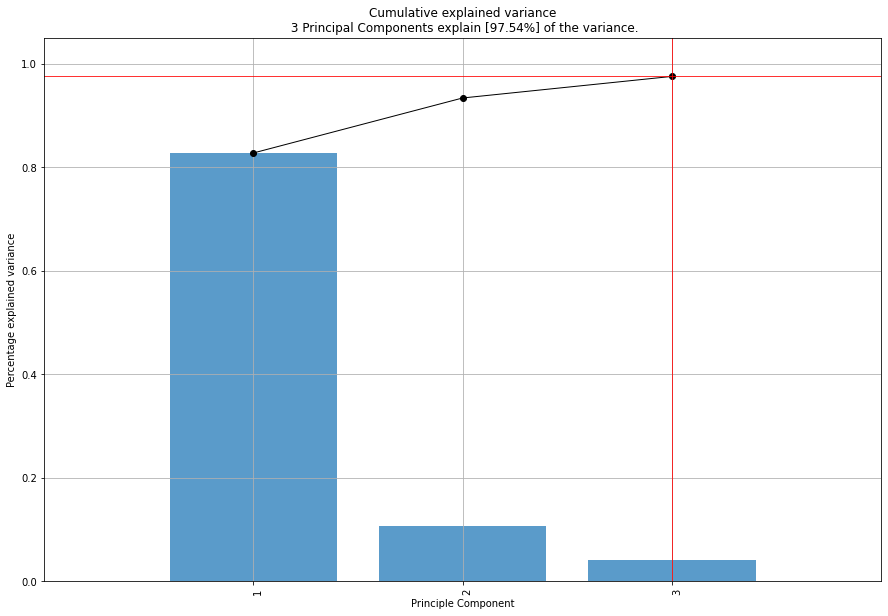

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

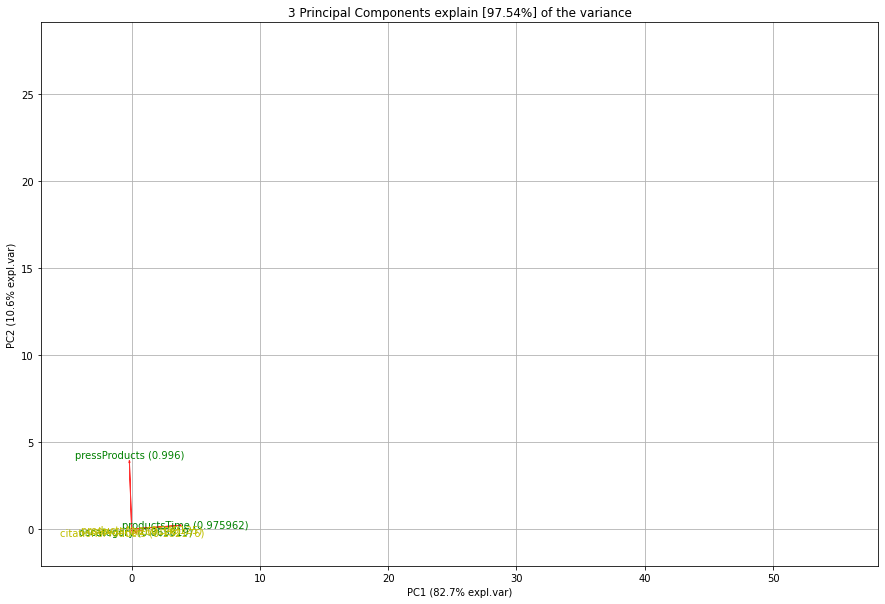

In [81]:
model=pca(n_components=3)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=6,legend=False,label=False,cmap=None)

In [33]:
model.results

{'loadings':      citationsProducts  pressProducts  productsAge  productsTime   oslevel  \
 PC1           0.016442      -0.044856     0.191820      0.975962  0.042989   
 PC2          -0.048343       0.996000    -0.018096      0.054656 -0.017422   
 PC3           0.182176       0.067220     0.349125     -0.151978  0.260126   
 
      oscategory  
 PC1    0.081071  
 PC2   -0.045031  
 PC3    0.865819  ,
 'PC':           PC1       PC2       PC3
 0    0.595870 -0.522064  1.726201
 1   -2.571241 -0.521332 -0.098742
 2   -0.089497 -0.457704 -0.189685
 3   -2.977717  1.185544 -0.200583
 4    1.984393 -0.550557  2.047973
 ..        ...       ...       ...
 250 -2.550121 -0.078686 -0.660166
 251 -1.492265 -0.520465  0.332795
 252 -2.953731 -0.267004 -0.339348
 253 -1.760353 -0.507902 -0.344730
 254  2.943564 -0.221578 -0.275645
 
 [255 rows x 3 columns],
 'explained_var': array([0.82754656, 0.93379261, 0.97546616]),
 'variance_ratio': array([0.82754656, 0.10624605, 0.04167355]),
 'model': PCA

### Con las variables normalizadas

In [73]:
pca_data=data[["std_citationsProducts","std_pressProducts","std_productsAge","std_productsTime","std_oslevel","std_oscategory"]]

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


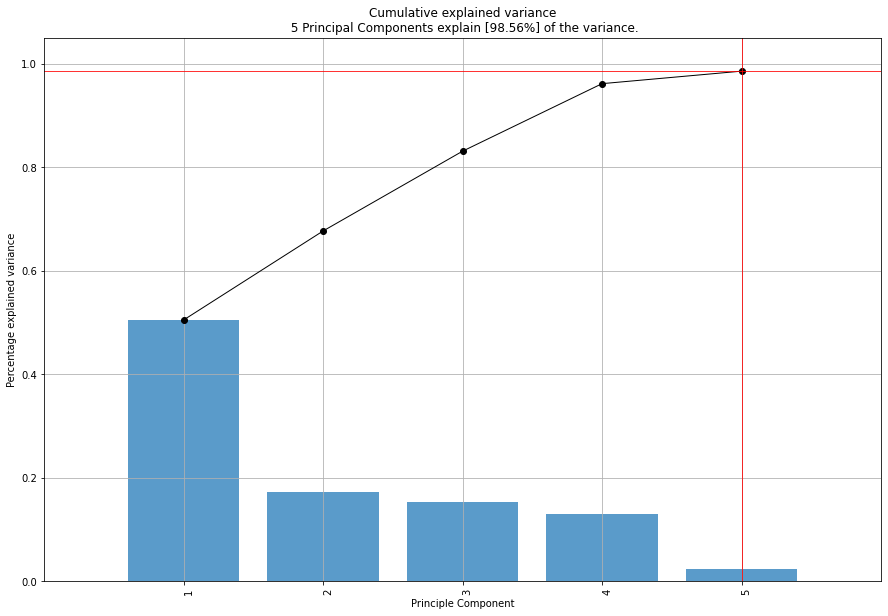

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

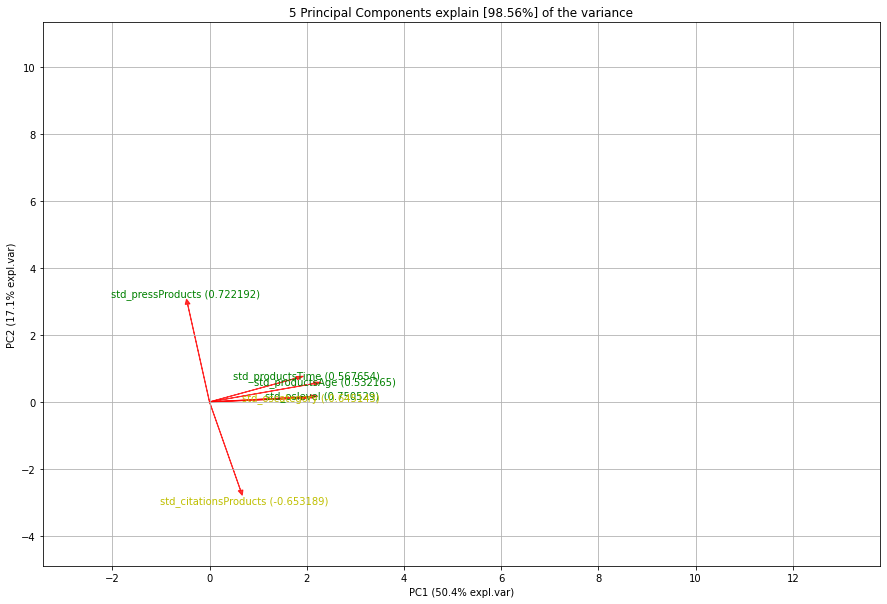

In [74]:
model=pca(n_components=5)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=6,legend=False,label=False,cmap=None)

In [49]:
model.results

{'loadings':      std_citationsProducts  std_pressProducts  std_productsAge  \
 PC1               0.158198          -0.111519         0.532165   
 PC2              -0.653189           0.722192         0.135696   
 PC3               0.622601           0.647618        -0.146044   
 PC4               0.400427           0.215620         0.253624   
 PC5              -0.016320           0.009794        -0.041219   
 
      std_productsTime  std_oslevel  std_oscategory  
 PC1          0.444263     0.514834        0.465740  
 PC2          0.176118     0.039668        0.027900  
 PC3         -0.304949     0.147110        0.238733  
 PC4          0.567654    -0.340771       -0.538966  
 PC5         -0.135776     0.750529       -0.645143  ,
 'PC':           PC1       PC2       PC3       PC4       PC5
 0    1.661407 -0.096426  0.325511 -0.818666 -0.023696
 1   -0.724139  0.079855 -0.393868 -0.461625 -0.046461
 2   -0.116572 -0.304508 -0.078941  0.121890  0.014331
 3   -1.029989  0.713926  0.12434

### Con las variables sugeridas por el profesor

In [69]:
pca_data=data[["std_citationsProducts","std_productsTime","std_productsAge","std_oslevel","std_oscategory"]]

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


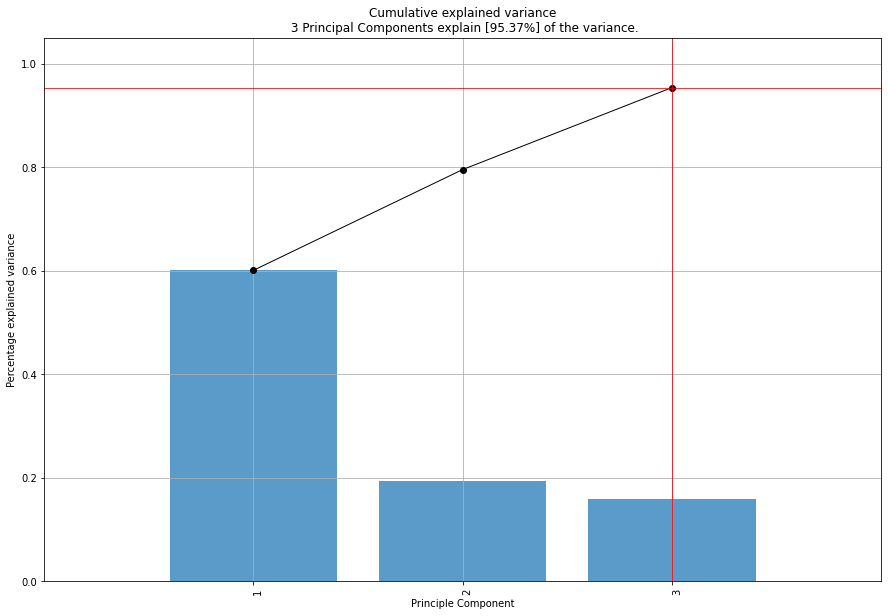

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

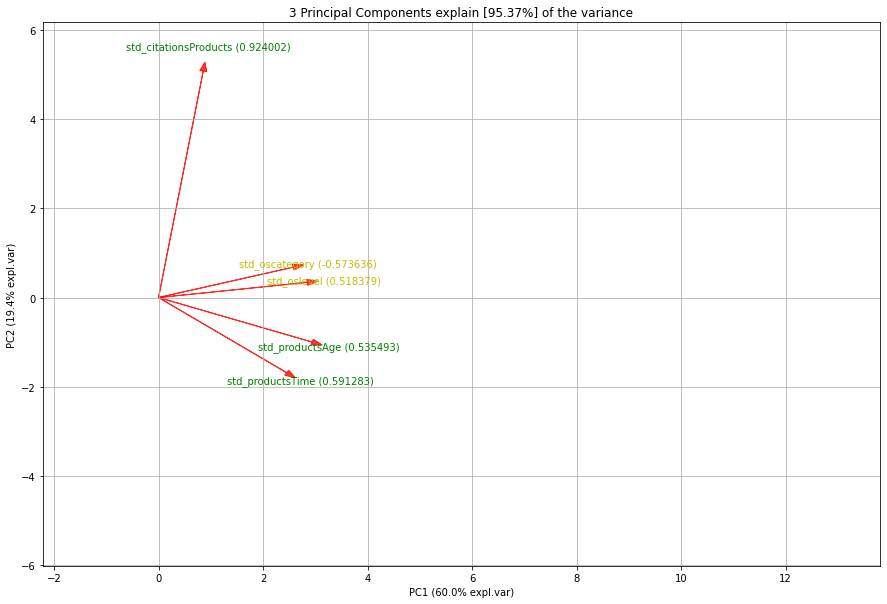

In [71]:
model=pca(n_components=3)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=5,legend=False,label=False,cmap=None)

In [54]:
model.results

{'loadings':      std_citationsProducts  std_productsTime  std_oslevel  std_oscategory
 PC1               0.223434          0.447377     0.630379        0.593763
 PC2               0.965222         -0.225010    -0.102901       -0.084431
 PC3               0.134593          0.848847    -0.211931       -0.465220,
 'PC':           PC1       PC2       PC3
 0    1.535165 -0.042226 -0.765991
 1   -0.635247 -0.424069 -0.340999
 2   -0.132401  0.202185  0.108360
 3   -0.773750 -0.468144 -0.316789
 4    2.196957  0.186473 -0.766082
 ..        ...       ...       ...
 250 -1.060654 -0.198754 -0.006380
 251 -0.246127  0.004285 -0.269425
 252 -0.829710 -0.696056 -0.354214
 253 -0.593336 -0.137143 -0.087717
 254  0.540093 -0.248696  0.373608
 
 [255 rows x 3 columns],
 'explained_var': array([0.55319124, 0.78846759, 0.96379506]),
 'variance_ratio': array([0.55319124, 0.23527635, 0.17532747]),
 'model': PCA(n_components=3),
 'scaler': None,
 'pcp': 0.9637950571506673,
 'topfeat':     PC             

### Los definitivos

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


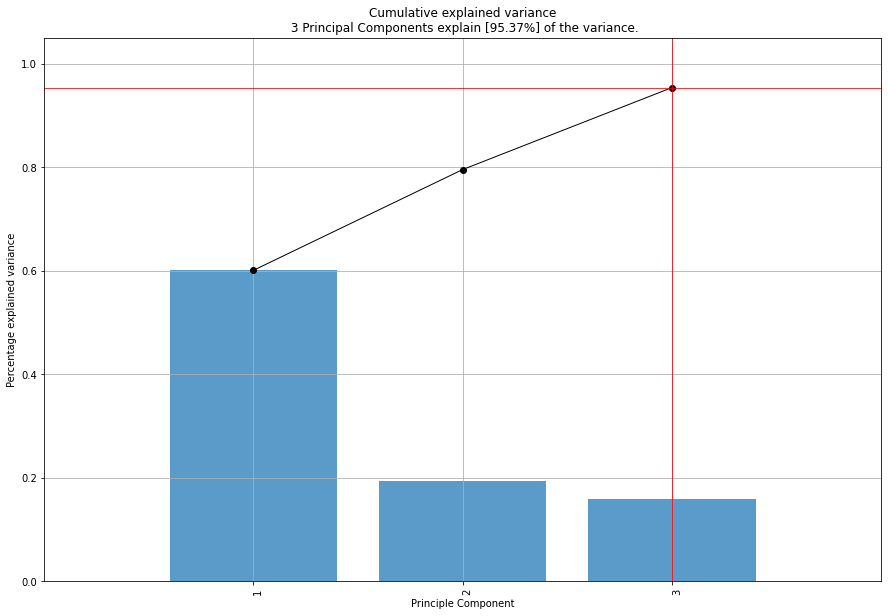

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

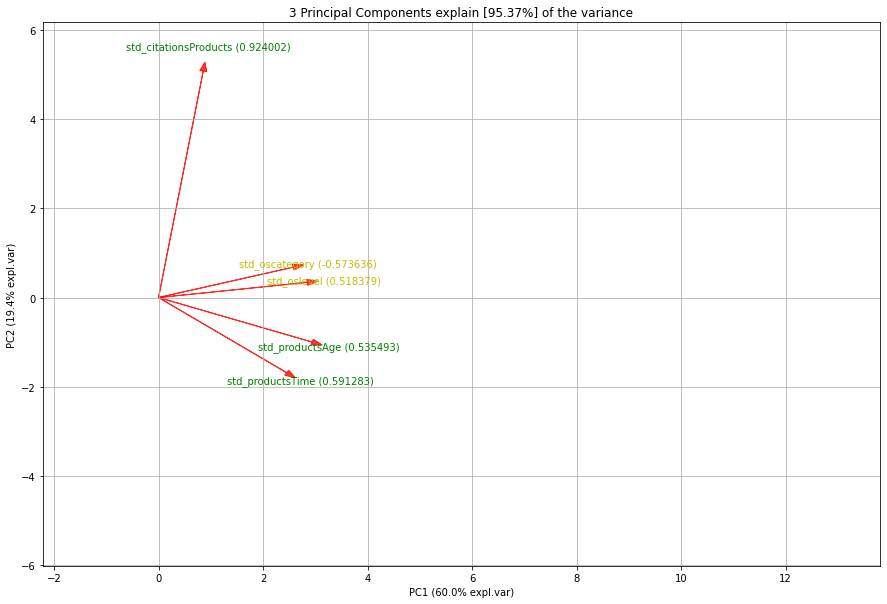

{'loadings':      std_productsTime  std_productsAge  std_citationsProducts  std_oslevel  \
 PC1          0.446884         0.535493               0.155751     0.518379   
 PC2         -0.306640        -0.181610               0.924002     0.062042   
 PC3          0.591283         0.260079               0.348689    -0.363458   
 
      std_oscategory  
 PC1        0.469646  
 PC2        0.123939  
 PC3       -0.573636  ,
 'PC':           PC1       PC2       PC3
 0    1.648002  0.258384 -0.845236
 1   -0.751100 -0.373875 -0.385200
 2   -0.144100  0.155199  0.169819
 3   -0.961606 -0.412461 -0.392492
 4    2.217762  0.586721 -0.918079
 ..        ...       ...       ...
 250 -1.151641 -0.288221  0.047382
 251 -0.224294  0.014056 -0.181950
 252 -1.012891 -0.626185 -0.484679
 253 -0.702958 -0.150106 -0.082240
 254  0.845225 -0.333377  0.309984
 
 [255 rows x 3 columns],
 'explained_var': array([0.60084968, 0.79547675, 0.9537678 ]),
 'variance_ratio': array([0.60084968, 0.19462707, 0.15829105]

In [100]:
#prensa va solita
# Hay que buscar uno de productsAge y productsTime
pca_data=data[["std_productsTime","std_productsAge","std_citationsProducts","std_oslevel","std_oscategory"]]
model=pca(n_components=3)
results=model.fit_transform(pca_data)
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=5,legend=False,label=False,cmap=None)
model.results

In [101]:
data["PCA_time"]=model.results["PC"]["PC3"]
data["PCA_production"]=model.results["PC"]["PC2"]
data["PCA_classification"]=model.results["PC"]["PC1"]

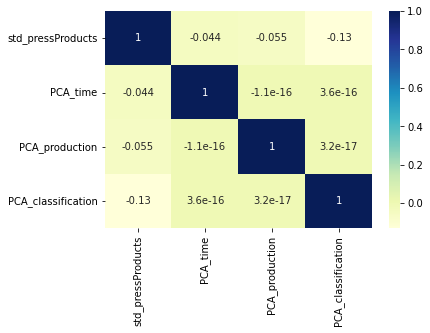

In [102]:
sns.heatmap(data[["std_pressProducts","PCA_time","PCA_production","PCA_classification"]].corr(), cmap="YlGnBu", annot=True);

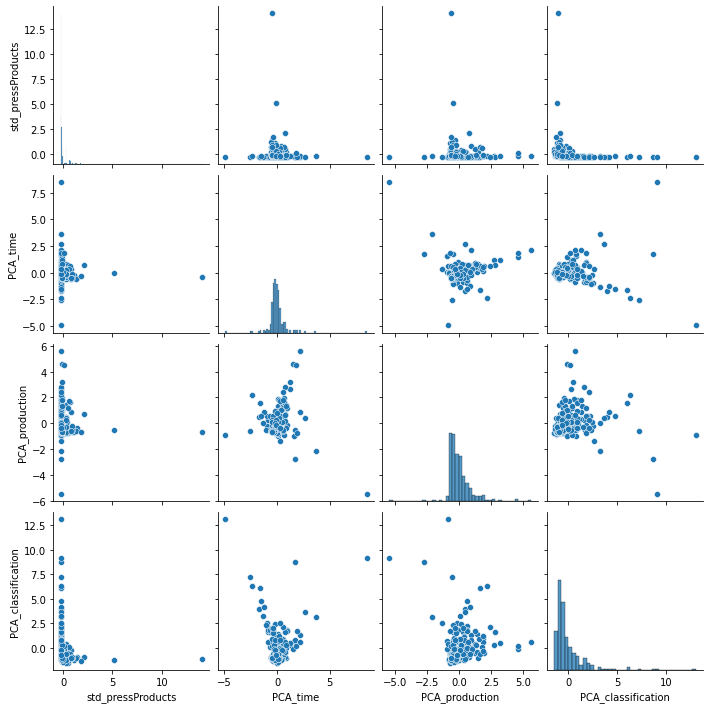

In [104]:
sns.pairplot(data[["std_pressProducts","PCA_time","PCA_production","PCA_classification"]],kind="scatter")

## Factor analisis

In [ ]:
#Se debe hacer con variables normalizadas

In [21]:
factor_data=data[["citationsProducts","pressProducts","productsAge","productsTime","oslevel","oscategory"]]
factor_data=pd.DataFrame()
factor_data["citationsProducts"]=(data["citationsProducts"]-np.mean(data["citationsProducts"]))/np.std(data["citationsProducts"])
factor_data["pressProducts"]=(data["pressProducts"]-np.mean(data["pressProducts"]))/np.std(data["pressProducts"])
factor_data["productsAge"]=(data["productsAge"]-np.mean(data["productsAge"]))/np.std(data["productsAge"])
factor_data["productsTime"]=(data["productsTime"]-np.mean(data["productsTime"]))/np.std(data["productsTime"])
factor_data["oslevel"]=(data["oslevel"]-np.mean(data["oslevel"]))/np.std(data["oslevel"])
factor_data["oscategory"]=(data["oscategory"]-np.mean(data["oscategory"]))/np.std(data["oscategory"])

In [22]:
fa = FactorAnalyzer()
fa.set_params(n_factors=1, rotation="varimax")
fa.fit(factor_data)

/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [23]:
fa.get_eigenvalues()

(array([3.02978256, 1.0315382 , 0.92488391, 0.782718  , 0.14490881,
        0.08616852]),
 array([ 2.70809224,  0.42492386,  0.07105023, -0.07670457, -0.17244092,
        -0.24682859]))

In [ ]:
#extraer varianza específica o la varianza no explicada por comunalidades

In [24]:
fa.get_communalities()

array([0.03917591, 0.01885278, 0.89393456, 0.46697364, 0.75803862,
       0.53111673])

In [25]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9981098202393538

In [26]:
fa_varimax = FactorAnalyzer(rotation='varimax')
fa_varimax.fit(factor_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [27]:
fa_varimax.get_communalities()

array([0.12709512, 0.08513241, 0.88112272, 0.99190966, 0.88335484,
       0.8171734 ])

In [28]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9981098202393538

# Clustering

### Con los datos pelados

In [161]:
data_clustering=data[["citationsProducts","pressProducts","productsAge","productsTime",]]

In [162]:
kmeans=KMeans(n_clusters=2,max_iter=1000,tol=1e-6)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

In [163]:
centroids = kmeans.cluster_centers_
centroids

array([[7.56862932e-01, 5.50209172e-01, 6.49791217e-01, 2.36851752e+00],
       [7.47428100e-01, 1.68897637e-02, 6.29732895e+00, 3.34183333e+01]])

In [164]:
centroids[0,[0,2]],centroids[1,[0,2]]

(array([0.75686293, 0.64979122]), array([0.7474281 , 6.29732895]))

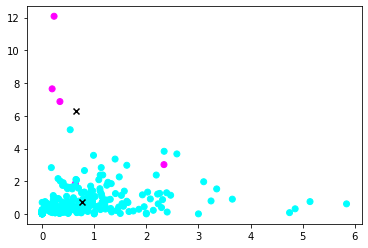

In [166]:
plt.scatter(data["citationsProducts"],data["productsAge"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,2]],centroids[1,[0,2]],c="black",marker="x")

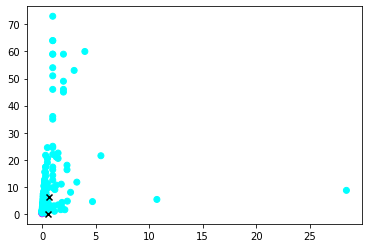

In [169]:
plt.scatter(data["pressProducts"],data["ageProducts"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[1,2]],centroids[1,[1,2]],c="black",marker="x")

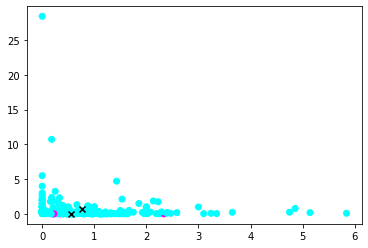

In [171]:
plt.scatter(data["citationsProducts"],data["pressProducts"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,1]],centroids[1,[0,1]],c="black",marker="x")

### With results from PCA

In [184]:
data_clustering=model.results["PC"][["PC1","PC2"]]
kmeans=KMeans(n_clusters=3,max_iter=1000,tol=1e-6)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

In [185]:
centroids= kmeans.cluster_centers_
centroids

array([[ 4.40181432, -0.2864881 ],
       [-1.6044624 ,  0.03876403],
       [30.98838275,  1.01668505]])

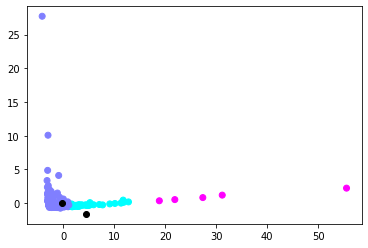

In [186]:
plt.scatter(data_clustering["PC1"],data_clustering["PC2"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,:],centroids[1,:],c="black")

# MANOVA

In [6]:
data_manova=data[["category","level","products","press",,"citations"]]

In [8]:
manova = MANOVA.from_formula("products + citations ~ category + level",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9554 2.0000 276.0000  6.4353 0.0019
         Pillai's trace 0.0446 2.0000 276.0000  6.4353 0.0019
 Hotelling-Lawley trace 0.0466 2.0000 276.0000  6.4353 0.0019
    Roy's greatest root 0.0466 2.0000 276.0000  6.4353 0.0019
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9216 6.0000 552.0000  3.8351 0.0009
         Pillai's trace 0.0785 6.0000 554.0000  3.7710 0.0011
 Hotelling-Lawley trace 0.

In [68]:
data_manova = model.results["PC"][["PC1","PC2"]]
data_manova=data_manova.join(data["category"])
data_manova.columns

Index(['PC1', 'PC2', 'category'], dtype='object')

In [69]:
manova = MANOVA.from_formula("PC1 + PC2 ~ category",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9434 2.0000 280.0000  8.4023 0.0003
         Pillai's trace 0.0566 2.0000 280.0000  8.4023 0.0003
 Hotelling-Lawley trace 0.0600 2.0000 280.0000  8.4023 0.0003
    Roy's greatest root 0.0600 2.0000 280.0000  8.4023 0.0003
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8343 6.0000 560.0000  8.8460 0.0000
         Pillai's trace 0.1664 6.0000 562.0000  8.5031 0.0000
 Hotelling-Lawley trace 0.